In [1]:
import pandas as pd
from vega_datasets import data


Use the above dataset for the exercises below:

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
1. Write the code necessary to visualize the minimum temperature over time.
1. Write the code necessary to visualize the maximum temperature over time.
1. Which month is the coldest, on average?
1. Which month has the highest average temperature?
1. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
1. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [2]:
df = data.sf_temps()
df = pd.DataFrame(df)
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [5]:
# Set date as index
df = df.set_index('date').sort_index()

<AxesSubplot:xlabel='date'>

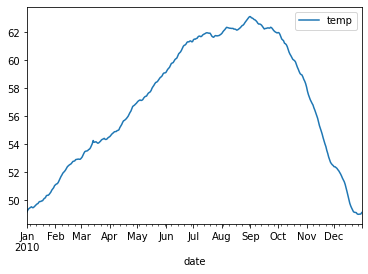

In [6]:
# Resample by the day and take the average temperature. Visualize the average temperature over time.
by_day = df.resample('D').mean()
by_day.plot()

<AxesSubplot:xlabel='date'>

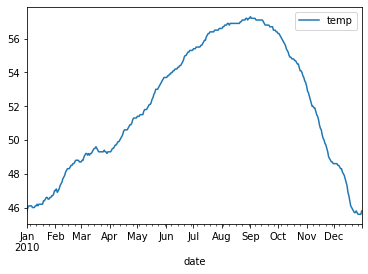

In [7]:
# Write the code necessary to visualize the minimum temperature over time.
by_day_min = df.resample('D').min()
by_day_min.plot()

<AxesSubplot:xlabel='date'>

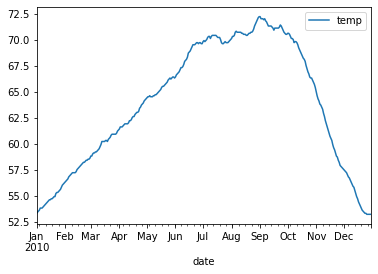

In [8]:
# Write the code necessary to visualize the maximum temperature over time
by_day_max =  df.resample('D').max()
by_day_max.plot()

In [9]:
# Which month is the coldest, on average?
by_month = df.resample('M').mean()
by_month

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [10]:
by_month.min()
# January is the coldest month on average

temp    49.98414
dtype: float64

In [11]:
# Which month has the highest average temperature?
by_month.max()
# September is the highest average

temp    62.487083
dtype: float64

In [12]:
# Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
# Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
day_min_max = df.resample('D').agg(['min','max'])
day_min_max.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

<AxesSubplot:xlabel='date'>

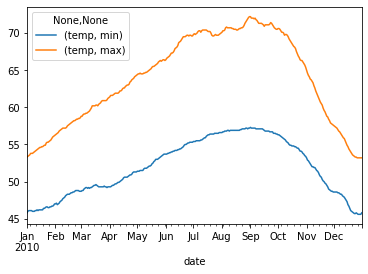

In [13]:
day_min_max.plot()

In [14]:
df.resample('D').agg(['min','max'])

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [16]:
by_day['min'] = df.resample('D').min()

In [17]:
by_day['max'] = df.resample('D').max()

In [18]:
by_day['diff'] = by_day['max'] - by_day['min']

In [21]:
by_day = by_day.rename(columns={'temp':'mean'})

In [40]:
# Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
by_day[by_day['diff']==15]

,mean,min,max,diff
date,,,,
2010-08-31,63.129167,57.2,72.2,15.0


<AxesSubplot:xlabel='date'>

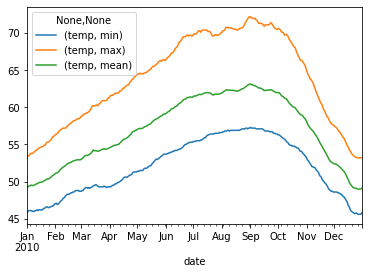

In [15]:
# Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.
df.resample('D').agg(['min','max', 'mean']).plot()